Epoch 1/20, Train Loss: 2.3087, Train Acc: 0.1044, Test Acc: 0.1135
Epoch 2/20, Train Loss: 2.3048, Train Acc: 0.1055, Test Acc: 0.0982
Epoch 3/20, Train Loss: 2.3044, Train Acc: 0.1072, Test Acc: 0.1009
Epoch 4/20, Train Loss: 2.3048, Train Acc: 0.1074, Test Acc: 0.1135
Epoch 5/20, Train Loss: 2.3033, Train Acc: 0.1113, Test Acc: 0.1032
Epoch 6/20, Train Loss: 1.6215, Train Acc: 0.3989, Test Acc: 0.8607
Epoch 7/20, Train Loss: 0.2805, Train Acc: 0.9135, Test Acc: 0.9493
Epoch 8/20, Train Loss: 0.1428, Train Acc: 0.9566, Test Acc: 0.9598
Epoch 9/20, Train Loss: 0.1014, Train Acc: 0.9686, Test Acc: 0.9557
Epoch 10/20, Train Loss: 0.0799, Train Acc: 0.9757, Test Acc: 0.9628
Epoch 11/20, Train Loss: 0.0665, Train Acc: 0.9794, Test Acc: 0.9843
Epoch 12/20, Train Loss: 0.0574, Train Acc: 0.9825, Test Acc: 0.9833
Epoch 13/20, Train Loss: 0.0509, Train Acc: 0.9841, Test Acc: 0.9870
Epoch 14/20, Train Loss: 0.0460, Train Acc: 0.9859, Test Acc: 0.9865
Epoch 15/20, Train Loss: 0.0413, Train Acc:

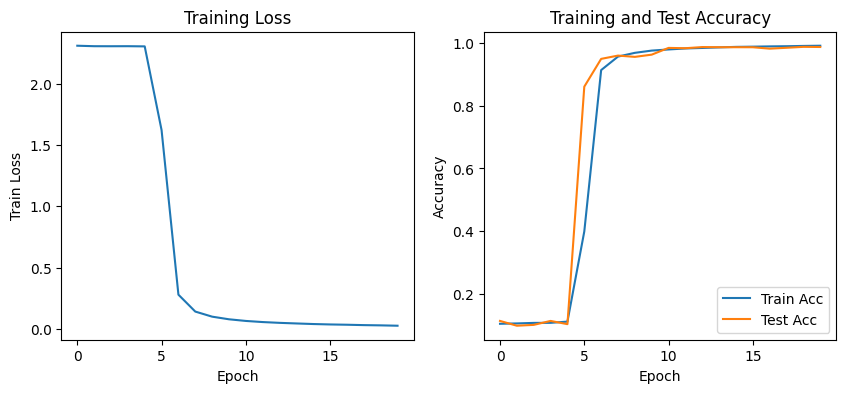

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define the network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.sigmoid(self.conv1(x))
        x = nn.functional.avg_pool2d(x, kernel_size=2, stride=2)
        x = torch.sigmoid(self.conv2(x))
        x = nn.functional.avg_pool2d(x, kernel_size=2, stride=2)
        x = torch.flatten(x, 1)
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x

# Function to train the network
def train(net, train_loader, test_loader, num_epochs, lr, device):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=lr)

    train_losses, train_accs, test_accs = [], [], []
    for epoch in range(num_epochs):
        net.train()
        running_loss, correct, total = 0.0, 0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
        train_loss = running_loss / len(train_loader.dataset)
        train_acc = correct / total

        # Test the network
        net.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = net(inputs)
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)
        test_acc = correct / total

        # Print statistics
        print(f'Epoch {epoch + 1}/{num_epochs}, '
              f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, '
              f'Test Acc: {test_acc:.4f}')

        train_losses.append(train_loss)
        train_accs.append(train_acc)
        test_accs.append(test_acc)

    return train_losses, train_accs, test_accs

# Prepare the data loaders
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST(root='./data', train=True, download=True, transform=transform),
    batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST(root='./data', train=False, download=True, transform=transform),
    batch_size=1000, shuffle=False)

# Initialize the network
net = Net()

# Define training parameters
lr = 0.9
num_epochs = 20
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the network to the appropriate device
net.to(device)

# Train the network
train_losses, train_accs, test_accs = train(net, train_loader, test_loader, num_epochs, lr, device)

# Plot the training loss and accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Acc')
plt.plot(test_accs, label='Test Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()


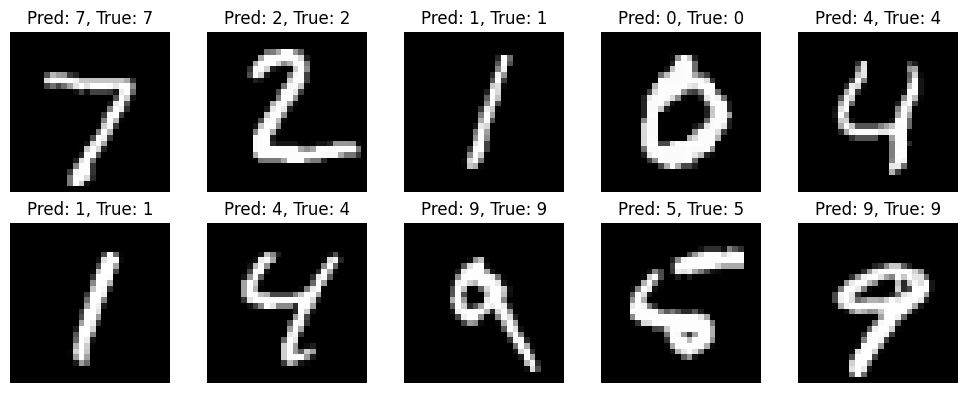

In [7]:
# Function to visualize predictions
def visualize_predictions(net, test_loader, device):
    net.eval()
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)

            # Visualize a batch of predictions
            plt.figure(figsize=(10, 4))
            for i in range(10):
                plt.subplot(2, 5, i + 1)
                plt.imshow(inputs[i].cpu().squeeze().numpy(), cmap='gray')
                plt.title(f'Pred: {predicted[i]}, True: {labels[i]}')
                plt.axis('off')
            plt.tight_layout()
            plt.show()
            break  # Show only one batch of predictions

# Visualize predictions
visualize_predictions(net, test_loader, device)